## Shannon Moran <br>
Phys 514 <br>
HW 6<br>
Due: Oct 26

## Import required packages

In [1]:
%matplotlib inline
import numpy as np
from math import *
import matplotlib.pyplot as plt
import time
import random

## Initialize Ising lattice

Set the initial configuration to a randon lattice.

In [15]:
def init_lattice(L,p):
    random_lattice = np.random.random((L,L))
    lattice = (random_lattice<=p)*1
    np.place(lattice,lattice==0,-1)
    return lattice

## Simulate the Ising model using Monte Carlo

Simulate the Ising model,

$$ H = -J\sum_{\langle i,j \rangle}S_iS_j$$

on a square lattice in two dimensions using Metropolis Monte Carlo with single spin flip updates.

In [53]:
# def get_neighbors(i,j,spins):
#     neighbors = []
#     if i!=0: neighbors.append(spins[i-1][j])
#     else: neighbors.append(spins[-1][j])
#     if j!=0: neighbors.append(spins[i][j-1])
#     else: neighbors.append(spins[i][j-1])
#     return neighbors

# def calc_energy(configuration,J):
#     E = np.zeros(configuration.shape)
#     nn_spins = neighbors_vec(configuration)
# #     E = np.sum(-J*configuration*nn_spins)
#     for i in range(configuration.shape[0]):
#         for j in range(configuration.shape[1]):
#             E[i][j] = -J*np.sum(configuration[i][j]*np.asarray(nn_spins[i][j]))
#     E = np.sum(E)
#     return E


# accounts for period boundary conditions
# to avoid double-counting nn interactions, only checks left and up from each site
def neighbors_vec(spins):
    neighbors = np.copy(np.roll(spins,+1,axis=1)+np.roll(spins,+1,axis=0))
    return neighbors

def spin_flip(configuration):
    positions = np.arange(configuration.shape[0])
    flip_i = random.choice(positions)
    flip_j = random.choice(positions)
    configuration[flip_i][flip_j] *= -1
    return configuration

def calc_energy(configuration,J):
    nn_spins = neighbors_vec(configuration)
    E = np.sum(-J*configuration*nn_spins)
    return E

def MC(config_old,J,beta):
    E_old = calc_energy(config_old,J)
    config_new = spin_flip(config_old)
    E_new = calc_energy(config_new,J)
    E_del = E_new - E_old
    if E_del<0: config = np.copy(config_new)
    else:
        p = np.exp(-beta*E_del)
        r = random.random()
        if r<p: config = np.copy(config_new)
        else: config = np.copy(config_old)
    return config

In [66]:
# Set system parameters
J = 1
beta= 10

# Set simulation parameters
N = 1e5
p = 0.7
L = 14

lattice0 = init_lattice(L,p)

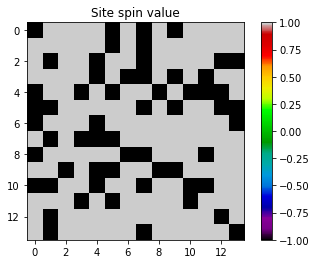

11.167950868606567


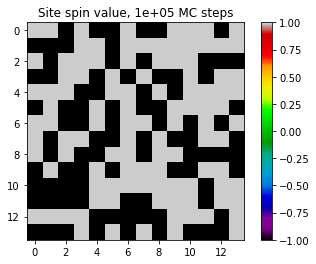

In [67]:
plt.imshow(lattice0,cmap='nipy_spectral',interpolation="none")
plt.title('Site spin value')
plt.colorbar()
plt.show()

step = 0
lattice = lattice0
t0 = time.time()
while step<N:
    step+=1
    lattice = np.copy(MC(lattice,J,beta))
print(time.time()-t0)
    
plt.imshow(lattice,cmap='nipy_spectral',interpolation="none")
plt.title('Site spin value, %0.0e MC steps' %N)
plt.colorbar()
plt.show()

## Compute system properties versus T

Compute the expectation values of the absolute value of the magnetization, magnetic susceptibility, the energy, and the specific heat as a function of temperature.

The expectation value of a quantity $A$ at a finite temperature $T$ is given by a sum over all states in the simulation:
$$ \langle A \rangle = \frac{1}{Z}\sum_i A_i exp(\beta E_i) $$

where $\beta=1/kT$, $A_i$ is the value of the quantity $A$ in the configuration $i$ with energy $E_i$.

The partition function is given by:
$$ Z = \sum_i exp(-\beta E_i) $$

This normalizes the probabilities $p_i=exp(\beta E_i)/Z$.

In [ ]:
'''
Open question: do we need to thermalize the system?
magnetization
magnetic susceptibility
specific heat
energy-- already calculated above
'''

## Find phase transition locations

Find the approximate location of the phase transition on small lattices.